In [21]:
import multiprocessing as mp
import time
import numpy as np
import math
matrices_A = [np.random.randint(10,900,(10*i,10*i)) for i in range(10)]
matrices_B = [np.random.randint(10,900,(10*i,10*i)) for i in range(10)]
time_multiply_matrices = []
time_multiply_matrices_parallel = []


"""Sequential matrix multiplication"""
def multiply_matrices(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
      for j in range(B.shape[1]):
        for k in range(B.shape[0]):
          # write your code here
          C[i,j] += A[i,k] * B[k,j]
    return C




"""this method creates a list of chunks which will be used for dividing the matrix among processors"""
def create_chunk(rows, n):
    div_list = []
    num = n
    while num > 0:
        # if the number of rows is larger than the number of processors then divide
        if rows > num:
            x = math.ceil(rows / num)
            div_list.append(int(x))
            rows -= x
            num -= 1
        elif rows == 0:
            div_list.append(0)
            num -= 1
        else:
            div_list.append(1)
            rows -= 1
            num -= 1
    return div_list



""" Parallel implementation """
def multiply_matrices_parallel(A, B, index):

  r = B.shape[1]
  for i in range(A.shape[0]):
      for j in range(B.shape[1]):
          sharedMemory1D[index*r + i*r + j] = np.sum(A[i,:] * B[:,j])

""" Function for running parallel computation of matrix multiplication"""
def run_parallel(A, B, numProcessors):
    processes = []
    m = 0
    n = A.shape[0]

    for i in range(numProcessors):
      x = create_chunk(A.shape[0], numProcessors)
      A_slice = A[m:m + x[i]]
      p = mp.Process(target=multiply_matrices_parallel, args=(A_slice, B,m ))
      p.start()
      m += x[i]
      processes.append(p)
        
    for p in processes:
        p.join()

    C = np.reshape(sharedMemory1D, (n,B.shape[1]))	
    return C


"""Vectorized implementation of matrix multiplication. 
Used in the parallel approach to help with smaller matrices"""
def multiply_matrices_vectorized(A, B):
    C = np.zeros((A.shape[0], B.shape[1]))
    # implement here your vectorized solution
    for i in range(A.shape[0]):
      for j in range(B.shape[1]):
        C[i,j] += np.sum(A[i,:] * B[:,j])
    return C


def run_sequential(A, B):
  matOut = multiply_matrices(A, B)
  return matOut



"""Graph"""
def get_multiply_matrices_time(A, B):
  time_start = time.time()
  C = multiply_matrices(A,B)
  time_end = time.time()
  return round(time_end - time_start,3)

def get_multiply_matrices_vectorized_time(A,B):

  time_start = time.time()
  n = A.shape[0]
  C = run_parallel(A,B, 4)
  # out = np.matmul(A, B)
  # print(C == out)
  time_end = time.time()
  return round(time_end - time_start,3)

for i in range(10):
  # print("Sequential:",get_multiply_matrices_time(matrices_A[i], matrices_B[i]))
  time_multiply_matrices.append(get_multiply_matrices_time(matrices_A[i], matrices_B[i]))
  sharedMemory1D = mp.Array("i", matrices_A[i].shape[0]* matrices_B[i].shape[1]) 

  # print("Parallel:", get_multiply_matrices_vectorized_time(matrices_A[i], matrices_B[i]))
  time_multiply_matrices_parallel.append(get_multiply_matrices_vectorized_time(matrices_A[i], matrices_B[i]))

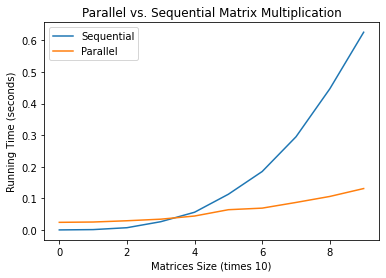

In [22]:
import matplotlib.pyplot as plt

plt.plot(time_multiply_matrices)
plt.plot(time_multiply_matrices_parallel)
plt.xlabel('Matrices Size (times 10)')
plt.ylabel('Running Time (seconds)')
plt.title('Parallel vs. Sequential Matrix Multiplication')
plt.legend(['Sequential', 'Parallel'])